# NLP Basics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
lst_text = ['it Was best oF Times $',
           'It was The worst of times.',
           'IT 9 was tHe age Of wisdom',
           'it was thE age of FOOLISHNESS']

df = pd.DataFrame({'text': lst_text})

df.head()

,text
0,it Was best oF Times $
1,It was The worst of times.
2,IT 9 was tHe age Of wisdom
3,it was thE age of FOOLISHNESS


In [3]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [4]:
stemmer = PorterStemmer()
stemmer

<PorterStemmer>

In [5]:
lemmatizer = WordNetLemmatizer()
lemmatizer

<WordNetLemmatizer>

In [6]:
raw_text = "This 1is Natural-LAnguage-Processing.!"
print(raw_text)

This 1is Natural-LAnguage-Processing.!


In [7]:
# Removing Special characters & digit from raw_text

sentence = re.sub("[^a-zA-Z]", " ", raw_text)
print(sentence)

This  is Natural LAnguage Processing  


In [8]:
# make all the sentence to lower case
sentence = sentence.lower()
print(sentence)

this  is natural language processing  


In [9]:
#divide the sentences into small parts
tokens = sentence.split()
print(tokens)

['this', 'is', 'natural', 'language', 'processing']


In [10]:
#removing stop words from the senetence
clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
print(clean_tokens)

['natural', 'language', 'processing']


In [11]:
#stemming finding root word
clean_tokens_stem = [stemmer.stem(word) for word in clean_tokens]
print(clean_tokens_stem)

['natur', 'languag', 'process']


In [12]:
# lemmatizing -: it means find the proper word from the English dictionary
clean_tokens_lem = [lemmatizer.lemmatize(word) for word in clean_tokens]
print(clean_tokens_lem)

['natural', 'language', 'processing']


In [13]:
#doing all above steps in one line

def preprocess(raw_text, flag):
    #removing special characters
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    #change sentence to lower case
    sentence = sentence.lower()
    
    #tokenize the words
    tokens = sentence.split()
    
    #remove stop words
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    
    #stemming / lemmatizeation
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
        
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [14]:
temp_df = df['text'].apply(lambda x: preprocess(x, 'stem'))


temp_df.head()

,0,1
0,best time,2
1,worst time,2
2,age wisdom,2
3,age foolish,2


In [15]:
temp_df.columns = ['clean_text_stem', 'text_lenght_stem']

temp_df.head()

,clean_text_stem,text_lenght_stem
0,best time,2
1,worst time,2
2,age wisdom,2
3,age foolish,2


In [16]:
df.head()

,text
0,it Was best oF Times $
1,It was The worst of times.
2,IT 9 was tHe age Of wisdom
3,it was thE age of FOOLISHNESS


In [17]:
temp_df.head()

,clean_text_stem,text_lenght_stem
0,best time,2
1,worst time,2
2,age wisdom,2
3,age foolish,2


In [18]:
df = pd.concat([df, temp_df], axis=1)

df.head()

,text,clean_text_stem,text_lenght_stem
0,it Was best oF Times $,best time,2
1,It was The worst of times.,worst time,2
2,IT 9 was tHe age Of wisdom,age wisdom,2
3,it was thE age of FOOLISHNESS,age foolish,2


In [19]:
temp_df = df['text'].apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

,0,1
0,best time,2
1,worst time,2
2,age wisdom,2
3,age foolishness,2


In [20]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df.head()

,clean_text_lemma,text_length_lemma
0,best time,2
1,worst time,2
2,age wisdom,2
3,age foolishness,2


In [21]:
df = pd.concat([df, temp_df], axis=1)

df.head()

,text,clean_text_stem,text_lenght_stem,clean_text_lemma,text_length_lemma
0,it Was best oF Times $,best time,2,best time,2
1,It was The worst of times.,worst time,2,worst time,2
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2
3,it was thE age of FOOLISHNESS,age foolish,2,age foolishness,2


# Bag of Word

In [22]:
df.head()

,text,clean_text_stem,text_lenght_stem,clean_text_lemma,text_length_lemma
0,it Was best oF Times $,best time,2,best time,2
1,It was The worst of times.,worst time,2,worst time,2
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2
3,it was thE age of FOOLISHNESS,age foolish,2,age foolishness,2


In [23]:
# bag of word

from sklearn.feature_extraction.text import CountVectorizer

vocab = CountVectorizer()

dtm = vocab.fit_transform(df['clean_text_lemma'])


In [24]:
dtm

<4x6 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [25]:
#find out word unique ness means how many times word comes in data
vocab.vocabulary_

{'best': 1, 'time': 3, 'worst': 5, 'age': 0, 'wisdom': 4, 'foolishness': 2}

In [26]:
#find out document and word (4 document and 6 words)
print(dtm.shape)

(4, 6)


In [27]:
print(dtm)

  (0, 1)	1
  (0, 3)	1
  (1, 3)	1
  (1, 5)	1
  (2, 0)	1
  (2, 4)	1
  (3, 0)	1
  (3, 2)	1


In [28]:
print(dtm.toarray())

[[0 1 0 1 0 0]
 [0 0 0 1 0 1]
 [1 0 0 0 1 0]
 [1 0 1 0 0 0]]


In [29]:
vocabulary = vocab.vocabulary_

print(vocabulary)

print(vocabulary.keys())

sort_vocab_tup = sorted(vocabulary.items(), key = lambda x: x[1])

print(sort_vocab_tup)

sort_vocab = [tup[0] for tup in sort_vocab_tup]

print(sort_vocab)

{'best': 1, 'time': 3, 'worst': 5, 'age': 0, 'wisdom': 4, 'foolishness': 2}
dict_keys(['best', 'time', 'worst', 'age', 'wisdom', 'foolishness'])
[('age', 0), ('best', 1), ('foolishness', 2), ('time', 3), ('wisdom', 4), ('worst', 5)]
['age', 'best', 'foolishness', 'time', 'wisdom', 'worst']


In [30]:
sorted(vocab.vocabulary_)

['age', 'best', 'foolishness', 'time', 'wisdom', 'worst']

In [31]:
pd.DataFrame(dtm.toarray(), columns= sorted(vocab.vocabulary_))

,age,best,foolishness,time,wisdom,worst
0,0,1,0,1,0,0
1,0,0,0,1,0,1
2,1,0,0,0,1,0
3,1,0,1,0,0,0


In [32]:
vocab = CountVectorizer(ngram_range=[1,2])

dtm = vocab.fit_transform(df.clean_text_stem)

In [33]:
dtm

<4x10 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [34]:
print(vocab.vocabulary_)

{'best': 3, 'time': 6, 'best time': 4, 'worst': 8, 'worst time': 9, 'age': 0, 'wisdom': 7, 'age wisdom': 2, 'foolish': 5, 'age foolish': 1}


In [35]:
pd.DataFrame(dtm.toarray(), columns= sorted(vocab.vocabulary_))

,age,age foolish,age wisdom,best,best time,foolish,time,wisdom,worst,worst time
0,0,0,0,1,1,0,1,0,0,0
1,0,0,0,0,0,0,1,0,1,1
2,1,0,1,0,0,0,0,1,0,0
3,1,1,0,0,0,1,0,0,0,0


# TF IDF - Term Frequency Inverse Document Frequency

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

dtm = vectorizer.fit_transform(df.clean_text_lemma)

In [37]:
dtm

<4x6 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [38]:
print(vocab.vocabulary_)

{'best': 3, 'time': 6, 'best time': 4, 'worst': 8, 'worst time': 9, 'age': 0, 'wisdom': 7, 'age wisdom': 2, 'foolish': 5, 'age foolish': 1}


In [39]:
print(vectorizer.vocabulary_)

{'best': 1, 'time': 3, 'worst': 5, 'age': 0, 'wisdom': 4, 'foolishness': 2}


In [40]:
print(dtm.toarray())

[[0.         0.78528828 0.         0.6191303  0.         0.        ]
 [0.         0.         0.         0.6191303  0.         0.78528828]
 [0.6191303  0.         0.         0.         0.78528828 0.        ]
 [0.6191303  0.         0.78528828 0.         0.         0.        ]]


In [41]:
pd.DataFrame(dtm.toarray(), columns= sorted(vectorizer.vocabulary_))

,age,best,foolishness,time,wisdom,worst
0,0.00000,0.785288,0.000000,0.61913,0.000000,0.000000
1,0.00000,0.000000,0.000000,0.61913,0.000000,0.785288
2,0.61913,0.000000,0.000000,0.00000,0.785288,0.000000
3,0.61913,0.000000,0.785288,0.00000,0.000000,0.000000


 # Word2Vec

In [42]:
!pip install gensim

  Found existing installation: Cython 0.29.13
    Uninstalling Cython-0.29.13:
      Successfully uninstalled Cython-0.29.13


In [43]:
from gensim.models import Word2Vec

In [44]:
df['tokenize_sentences'] = df.clean_text_stem.apply(lambda sent: sent.split())

df.head()

,text,clean_text_stem,text_lenght_stem,clean_text_lemma,text_length_lemma,tokenize_sentences
0,it Was best oF Times $,best time,2,best time,2,"[best, time]"
1,It was The worst of times.,worst time,2,worst time,2,"[worst, time]"
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2,"[age, wisdom]"
3,it was thE age of FOOLISHNESS,age foolish,2,age foolishness,2,"[age, foolish]"


In [46]:
list(df.tokenize_sentences)

[['best', 'time'], ['worst', 'time'], ['age', 'wisdom'], ['age', 'foolish']]

In [47]:
#train the model
model = Word2Vec(list(df.tokenize_sentences), vector_size=100, min_count=1)

In [48]:
print(model)

Word2Vec<vocab=6, vector_size=100, alpha=0.025>


In [49]:
print(model.wv.key_to_index)

print(model.wv.index_to_key)

{'age': 0, 'time': 1, 'foolish': 2, 'wisdom': 3, 'worst': 4, 'best': 5}
['age', 'time', 'foolish', 'wisdom', 'worst', 'best']


In [50]:
print(model.wv.__getitem__('foolish'))

print(model.wv.__getitem__('foolish').shape)

[ 9.4563962e-05  3.0773187e-03 -6.8126465e-03 -1.3754654e-03
  7.6685809e-03  7.3464084e-03 -3.6732983e-03  2.6427007e-03
 -8.3171297e-03  6.2054847e-03 -4.6373224e-03 -3.1641079e-03
  9.3113566e-03  8.7338447e-04  7.4907015e-03 -6.0740639e-03
  5.1605059e-03  9.9228211e-03 -8.4573915e-03 -5.1356913e-03
 -7.0648384e-03 -4.8626517e-03 -3.7785650e-03 -8.5362010e-03
  7.9556061e-03 -4.8439382e-03  8.4236125e-03  5.2625705e-03
 -6.5500261e-03  3.9578700e-03  5.4701497e-03 -7.4265362e-03
 -7.4057197e-03 -2.4752307e-03 -8.6257271e-03 -1.5815735e-03
 -4.0343284e-04  3.2996845e-03  1.4418793e-03 -8.8142155e-04
 -5.5940580e-03  1.7303658e-03 -8.9737179e-04  6.7936899e-03
  3.9735888e-03  4.5294715e-03  1.4343048e-03 -2.6998566e-03
 -4.3668128e-03 -1.0320758e-03  1.4370275e-03 -2.6460099e-03
 -7.0737838e-03 -7.8053069e-03 -9.1217877e-03 -5.9351707e-03
 -1.8474245e-03 -4.3238713e-03 -6.4606713e-03 -3.7173224e-03
  4.2891572e-03 -3.7390448e-03  8.3781742e-03  1.5339922e-03
 -7.2423196e-03  9.43379

In [52]:
print(model.wv.__getitem__(model.wv.index_to_key))

[[-5.3622725e-04  2.3643016e-04  5.1033497e-03  9.0092728e-03
  -9.3029495e-03 -7.1168090e-03  6.4588715e-03  8.9729885e-03
  -5.0154282e-03 -3.7633730e-03  7.3805046e-03 -1.5334726e-03
  -4.5366143e-03  6.5540504e-03 -4.8601604e-03 -1.8160177e-03
   2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488189e-03
   7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
   6.3508893e-03 -3.4053659e-03 -9.4640255e-04  5.7685734e-03
  -7.5216386e-03 -3.9361049e-03 -7.5115822e-03 -9.3004224e-04
   9.5381187e-03 -7.3191668e-03 -2.3337698e-03 -1.9377422e-03
   8.0774352e-03 -5.9308959e-03  4.5161247e-05 -4.7537349e-03
  -9.6035507e-03  5.0072931e-03 -8.7595871e-03 -4.3918253e-03
  -3.5099984e-05 -2.9618264e-04 -7.6612402e-03  9.6147414e-03
   4.9820566e-03  9.2331432e-03 -8.1579182e-03  4.4957972e-03
  -4.1370774e-03  8.2453492e-04  8.4986184e-03 -4.4621779e-03
   4.5175003e-03 -6.7869616e-03 -3.5484887e-03  9.3985079e-03
  -1.5776539e-03  3.2137157e-04 -4.1406299e-03 -7.6826881e-03
  -1.508

In [57]:
print(model.wv.__getitem__(model.wv.index_to_key).shape)

(6, 100)


In [62]:
import os
os.getcwd()

'C:\\Users\\hp\\CLIENTOCLARIFY'

In [63]:
#save the model

model.save('C:\\Users\\hp\\CLIENTOCLARIFY\\first_word_vectors.bin')

#load model
new_model = Word2Vec.load('C:\\Users\\hp\\CLIENTOCLARIFY\\first_word_vectors.bin')

print(new_model)

Word2Vec<vocab=6, vector_size=100, alpha=0.025>


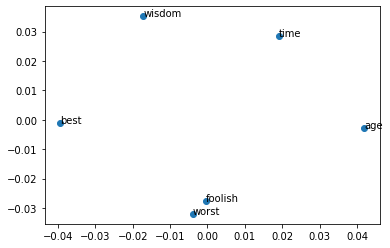

In [65]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = new_model.wv.__getitem__(new_model.wv.index_to_key)
pca = PCA(n_components = 2)
result = pca.fit_transform(X)


plt.scatter(result[:, 0], result[:, 1])
words = list(new_model.wv.index_to_key)

for i, word in enumerate(words):
    plt.annotate(word, xy= (result[i, 0], result[i, 1]))
    
plt.show()

In [66]:
model.wv.similarity('best', 'worst')

0.13887985

In [67]:
model.wv.most_similar('foolish')

[('worst', 0.17018882930278778),
 ('best', 0.06408979743719101),
 ('wisdom', -0.013514960184693336),
 ('time', -0.02367166243493557),
 ('age', -0.052346743643283844)]

# END